## Titer of all IDT-FL, IDT_HATail, IDT_ALAYT with backbones 25 (ZsG), 1247 (pHAGE6 Luc_ZsG), and 1270 (pHAGE Luc_ZsG) infecting 293Ts transduced with ACE2.

In [1]:
import os
import warnings

import pandas as pd
import numpy as np

from plotnine import *

from IPython.display import Image

In [2]:
warnings.simplefilter('ignore')

In [3]:
CBPALETTE = ('#999999', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7')

In [4]:
theme_set(theme_seaborn(style='white', context='paper', font_scale=1))

### Read in flow data

In [5]:
flow_data = pd.read_csv('DifBBs_DifTails_table_200413_titerscalc_cleanedcols.csv')

In [6]:
flow_data['Virus(mL)'] = flow_data['Virus(mL)'].astype('category')
flow_data

,Unnamed: 0,TubeName,Spike,BB,Cells,Virus(mL),%ZsG+,%ZsG+_conservative,Titer,Titer_Cons
0,Specimen_001_A5_A05_001.fcs,A5,None,pHAGE6,22800.0,0.03000,0.000,0.000,0.0,0.0
1,Specimen_001_A6_A06_002.fcs,A6,None,pHAGE,22800.0,0.03000,0.000,0.000,0.0,0.0
2,Specimen_001_I_1270_B4_003.fcs,I_1270_B4,Full_Length,pHAGE,22800.0,0.03000,0.098,0.072,746.0,548.0
3,Specimen_001_NV_25_001.fcs,NV_25,None,ZsGreen,22800.0,0.03000,0.000,0.000,0.0,0.0
4,Specimen_001_V_25_B1_002.fcs,V_25_B1,VSV-G,ZsGreen,22800.0,0.00120,16.700,13.900,3180000.0,2640000.0
5,Specimen_002_C1_C01_003.fcs,C1,VSV-G,ZsGreen,22800.0,0.00024,4.440,3.570,4220000.0,3400000.0
6,Specimen_004_B2_B02_005.fcs,B2,Full_Length,ZsGreen,22800.0,0.03000,7.110,1.770,54100.0,13500.0
7,Specimen_004_B3_B03_006.fcs,B3,Full_Length,pHAGE6,22800.0,0.03000,1.250,1.080,9510.0,8220.0
8,Specimen_004_C2_C02_007.fcs,C2,Full_Length,ZsGreen,22800.0,0.00600,0.310,0.250,11800.0,9510.0
9,Specimen_005_B5_B05_008.fcs,B5,HA_Tail,ZsGreen,22800.0,0.03000,5.990,0.480,45600.0,3650.0


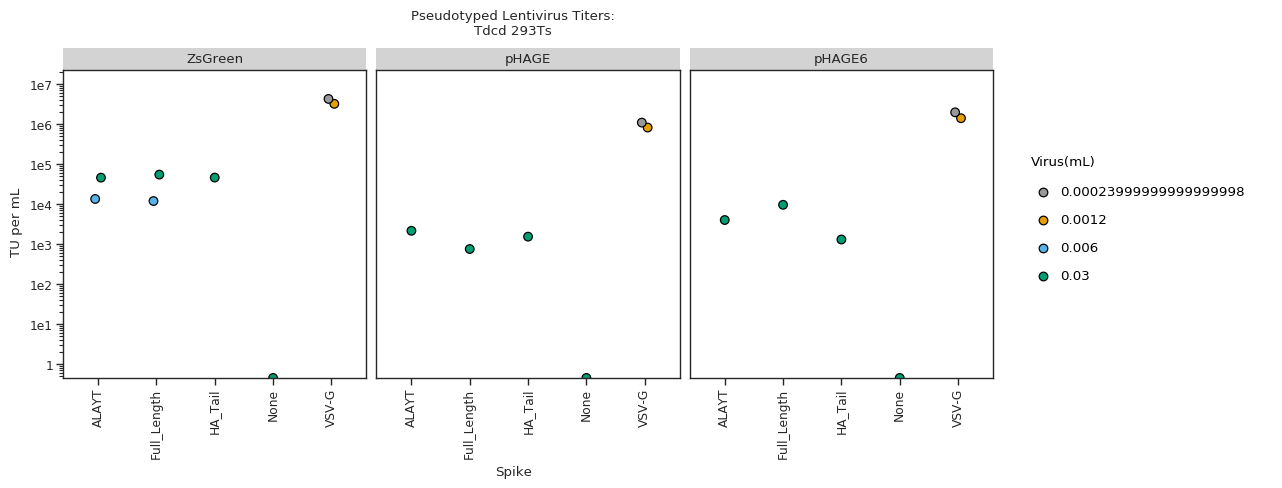

In [7]:
titers_by_bb = (ggplot(flow_data, aes(x='Spike', y='Titer', fill='Virus(mL)')) +
                              geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                              scale_fill_manual(values=CBPALETTE) +
                              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                              figure_size=(12, 4)) +
                              scale_y_log10(limits=[1e0, 1e7], breaks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) +
                              facet_wrap('~ BB', ncol=3) +
                              #geom_hline(yintercept=10) +
                              ylab('TU per mL') +
                              ggtitle('Pseudotyped Lentivirus Titers:\nTdcd 293Ts')
                             )

_ = titers_by_bb.draw()


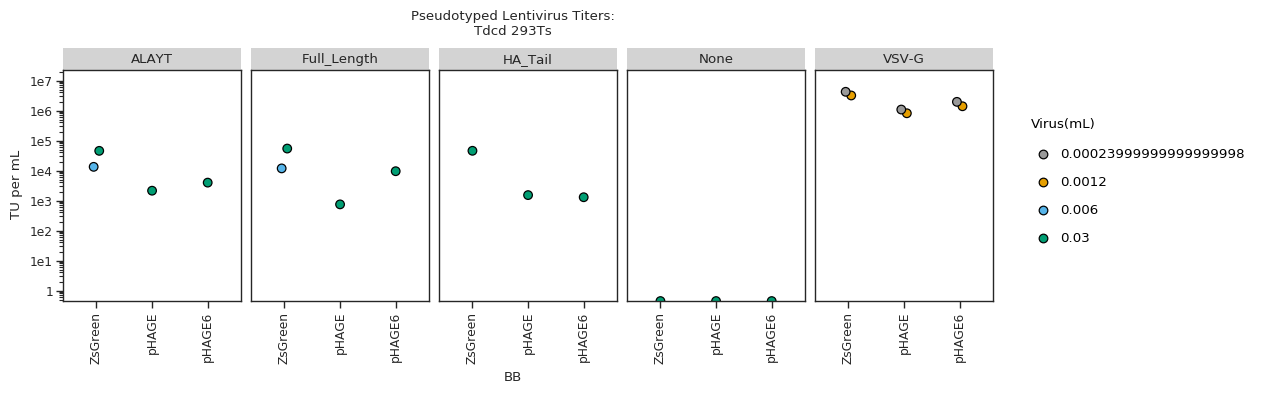

In [8]:
titers_by_spike = (ggplot(flow_data, aes(x='BB', y='Titer', fill='Virus(mL)')) +
                              geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                              scale_fill_manual(values=CBPALETTE) +
                              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                              figure_size=(12, 3)) +
                              scale_y_log10(limits=[1e0, 1e7], breaks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) +
                              facet_wrap('~ Spike', ncol=5) +
                              #geom_hline(yintercept=10) +
                              ylab('TU per mL') +
                              ggtitle('Pseudotyped Lentivirus Titers:\nTdcd 293Ts')
                             )

_ = titers_by_spike.draw()

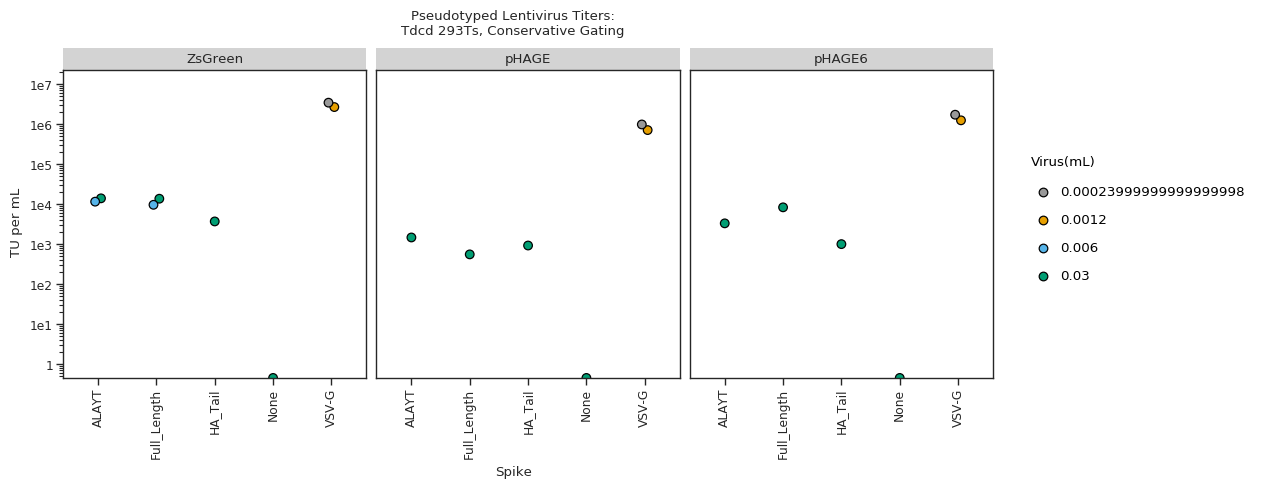

In [9]:
conservative_titers_by_bb = (ggplot(flow_data, aes(x='Spike', y='Titer_Cons', fill='Virus(mL)')) +
                              geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                              scale_fill_manual(values=CBPALETTE) +
                              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                              figure_size=(12, 4)) +
                              scale_y_log10(limits=[1e0, 1e7], breaks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) +
                              facet_wrap('~ BB', ncol=3) +
                              #geom_hline(yintercept=10) +
                              ylab('TU per mL') +
                              ggtitle('Pseudotyped Lentivirus Titers:\nTdcd 293Ts, Conservative Gating')
                             )

_ = conservative_titers_by_bb.draw()

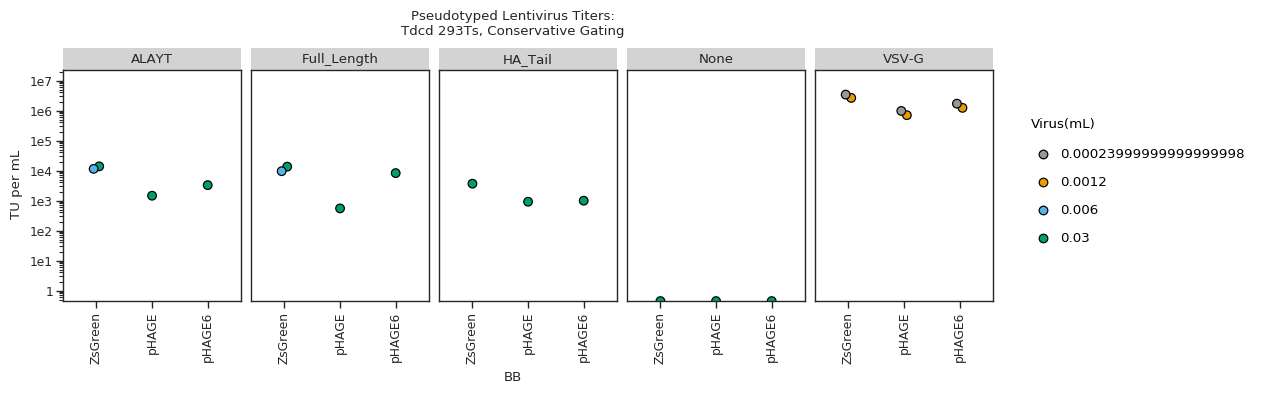

In [10]:
conservative_titers_by_spike = (ggplot(flow_data, aes(x='BB', y='Titer_Cons', fill='Virus(mL)')) +
                              geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                              scale_fill_manual(values=CBPALETTE) +
                              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                              figure_size=(12, 3)) +
                              scale_y_log10(limits=[1e0, 1e7], breaks=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) +
                              facet_wrap('~ Spike', ncol=5) +
                              #geom_hline(yintercept=10) +
                              ylab('TU per mL') +
                              ggtitle('Pseudotyped Lentivirus Titers:\nTdcd 293Ts, Conservative Gating')
                             )

_ = conservative_titers_by_spike.draw()

In [11]:
titers_for_fig = flow_data[(flow_data['Virus(mL)'] == 0.03) |
                           (flow_data['Virus(mL)'] == 0.00024) |
                           (flow_data['Virus(mL)'] == 0.0012)]

titers_for_fig.replace('Full_Length', 'Spike', inplace=True)
titers_for_fig.replace('HA_Tail', 'Spike-HAtail', inplace=True)
titers_for_fig.replace('ALAYT', 'Spike-ALAYT', inplace=True)
#titers_for_fig.replace('VSV-G', 'VSV G', inplace=True)
titers_for_fig.replace('ZsGreen', 'ZsGreen backbone', inplace=True)
titers_for_fig.replace('pHAGE', 'Luciferase-IRES-ZsGreen backbone 1', inplace=True)
titers_for_fig.replace('pHAGE6', 'Luciferase-IRES-ZsGreen backbone 2', inplace=True)

spike_list = ['Spike', 'Spike-ALAYT', 'Spike-HAtail', 'VSV-G', 'None']
spike_cat = pd.Categorical(titers_for_fig['Spike'], categories=spike_list)

bb_list = ['ZsGreen backbone'] #, 'Luciferase-IRES-ZsGreen backbone 1', 'Luciferase-IRES-ZsGreen backbone 2']
bb_cat = pd.Categorical(titers_for_fig['BB'], categories=bb_list)

titers_for_fig = titers_for_fig.assign(spike_cat = spike_cat)
titers_for_fig = titers_for_fig.assign(Backbone = bb_cat)

display(titers_for_fig)

,Unnamed: 0,TubeName,Spike,BB,Cells,Virus(mL),%ZsG+,%ZsG+_conservative,Titer,Titer_Cons,spike_cat,Backbone
0,Specimen_001_A5_A05_001.fcs,A5,None,Luciferase-IRES-ZsGreen backbone 2,22800.0,0.0300,0.000,0.000,0.0,0.0,None,NaN
1,Specimen_001_A6_A06_002.fcs,A6,None,Luciferase-IRES-ZsGreen backbone 1,22800.0,0.0300,0.000,0.000,0.0,0.0,None,NaN
2,Specimen_001_I_1270_B4_003.fcs,I_1270_B4,Spike,Luciferase-IRES-ZsGreen backbone 1,22800.0,0.0300,0.098,0.072,746.0,548.0,Spike,NaN
3,Specimen_001_NV_25_001.fcs,NV_25,None,ZsGreen backbone,22800.0,0.0300,0.000,0.000,0.0,0.0,None,ZsGreen backbone
4,Specimen_001_V_25_B1_002.fcs,V_25_B1,VSV-G,ZsGreen backbone,22800.0,0.0012,16.700,13.900,3180000.0,2640000.0,VSV-G,ZsGreen backbone
6,Specimen_004_B2_B02_005.fcs,B2,Spike,ZsGreen backbone,22800.0,0.0300,7.110,1.770,54100.0,13500.0,Spike,ZsGreen backbone
7,Specimen_004_B3_B03_006.fcs,B3,Spike,Luciferase-IRES-ZsGreen backbone 2,22800.0,0.0300,1.250,1.080,9510.0,8220.0,Spike,NaN
9,Specimen_005_B5_B05_008.fcs,B5,Spike-HAtail,ZsGreen backbone,22800.0,0.0300,5.990,0.480,45600.0,3650.0,Spike-HAtail,ZsGreen backbone
10,Specimen_005_B6_B06_009.fcs,B6,Spike-HAtail,Luciferase-IRES-ZsGreen backbone 2,22800.0,0.0300,0.170,0.130,1290.0,989.0,Spike-HAtail,NaN
11,Specimen_005_B7_B07_010.fcs,B7,Spike-HAtail,Luciferase-IRES-ZsGreen backbone 1,22800.0,0.0300,0.200,0.120,1520.0,913.0,Spike-HAtail,NaN


In [12]:
titers_for_flow_fig = titers_for_fig[titers_for_fig['Backbone'] == 'ZsGreen backbone']
titers_for_flow_fig

,Unnamed: 0,TubeName,Spike,BB,Cells,Virus(mL),%ZsG+,%ZsG+_conservative,Titer,Titer_Cons,spike_cat,Backbone
3,Specimen_001_NV_25_001.fcs,NV_25,None,ZsGreen backbone,22800.0,0.0300,0.00,0.00,0.0,0.0,None,ZsGreen backbone
4,Specimen_001_V_25_B1_002.fcs,V_25_B1,VSV-G,ZsGreen backbone,22800.0,0.0012,16.70,13.90,3180000.0,2640000.0,VSV-G,ZsGreen backbone
6,Specimen_004_B2_B02_005.fcs,B2,Spike,ZsGreen backbone,22800.0,0.0300,7.11,1.77,54100.0,13500.0,Spike,ZsGreen backbone
9,Specimen_005_B5_B05_008.fcs,B5,Spike-HAtail,ZsGreen backbone,22800.0,0.0300,5.99,0.48,45600.0,3650.0,Spike-HAtail,ZsGreen backbone
12,Specimen_006_B8_B08_011.fcs,B8,Spike-ALAYT,ZsGreen backbone,22800.0,0.0300,5.96,1.81,45400.0,13800.0,Spike-ALAYT,ZsGreen backbone


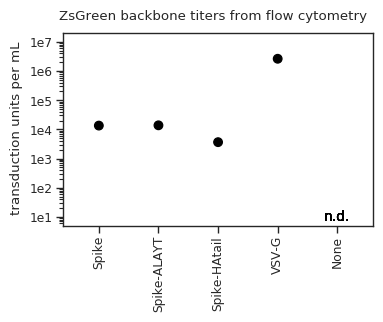

In [13]:
figure_spike_titers = (ggplot(titers_for_flow_fig.replace(0, float('NaN')),
                              aes(x='spike_cat', y='Titer_Cons')
                              ) +
                              geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                              geom_text(label='n.d.', x=5, y=1, size=10, fontweight='normal', fontstyle='normal') +
                              # scale_fill_manual(values=CBPALETTE, name='Backbone') +
                              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                              figure_size=(4, 2.5)) +
                              scale_y_log10(limits=[1e1, 1e7], breaks=[1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]) +
                              #geom_hline(yintercept=10) +
                              ylab('transduction units per mL') +
                              xlab('') +
                              ggtitle('ZsGreen backbone titers from flow cytometry') 
                             )
_ = figure_spike_titers.draw()

figure_spike_titers.save('200413_TUpermL_ZsG.pdf')

In [14]:
RLUs_per_mL_all = {'FL_1247': [1.19E+07, 1.11E+07, 1.09E+07, 9.71E+06],
               'FL_1270': [1.81E+06, 1.40E+06, 1.69E+06, 2.21E+06],
               'HA_1247': [2.85E+07, 3.27E+06, 2.72E+06, 1.67E+06],
               'HA_1270': [1.89E+07, 3.09E+06, 2.18E+06, 1.36E+06],
               'ALAYT_1247': [3.78E+07, 7.57E+06, 7.25E+06, 9.64E+06],
               'ALAYT_1270': [3.06E+06, 2.64E+06, 3.32E+06, 5.19E+06],
               'VSVG_1247': [2.47E+08, 2.70E+08],
               'VSVG_1270': [1.43E+08, 1.55E+08]}

In [15]:
RLUs_per_mL = {'FL_1247': [np.nan, 1.11E+07, 1.09E+07, 9.71E+06],
               'FL_1270': [np.nan, 1.40E+06, 1.69E+06, 2.21E+06],
               'HA_1247': [np.nan, 3.27E+06, 2.72E+06, 1.67E+06],
               'HA_1270': [np.nan, 3.09E+06, 2.18E+06, 1.36E+06],
               'ALAYT_1247': [np.nan, 7.57E+06, 7.25E+06, 9.64E+06],
               'ALAYT_1270': [np.nan, 2.64E+06, 3.32E+06, 5.19E+06],
               'VSVG_1247': [np.nan, np.nan, 2.47E+08, 2.70E+08],
               'VSVG_1270': [np.nan, np.nan, 1.43E+08, 1.55E+08]}

In [16]:
RLUs_df = pd.DataFrame.from_dict(RLUs_per_mL, orient='index')
display(RLUs_df)

,0,1,2,3
FL_1247,NaN,11100000.0,10900000.0,9710000.0
FL_1270,NaN,1400000.0,1690000.0,2210000.0
HA_1247,NaN,3270000.0,2720000.0,1670000.0
HA_1270,NaN,3090000.0,2180000.0,1360000.0
ALAYT_1247,NaN,7570000.0,7250000.0,9640000.0
ALAYT_1270,NaN,2640000.0,3320000.0,5190000.0
VSVG_1247,NaN,NaN,247000000.0,270000000.0
VSVG_1270,NaN,NaN,143000000.0,155000000.0


In [17]:
RLUs_df['Average'] = np.nan
RLUs_df['upper'] = np.nan
RLUs_df['lower'] = np.nan
for sample in RLUs_per_mL.keys():
    RLUs_df['Average'].loc[sample] = np.nanmean(RLUs_df.loc[sample])
    print(np.std(RLUs_df.loc[sample]))
    RLUs_df['upper'].loc[sample] = RLUs_df['Average'].loc[sample] + np.std(RLUs_df.loc[sample])
    RLUs_df['lower'].loc[sample] = RLUs_df['Average'].loc[sample] - np.std(RLUs_df.loc[sample])
RLUs_df.reset_index(inplace=True)

531366.1637703327
290201.07971313037
574818.8120326846
611923.1977952789
917396.6790144091
933711.2330194314
9389710.68066885
4898979.485566356


In [18]:
display(RLUs_df)

,index,0,1,2,3,Average,upper,lower
0,FL_1247,NaN,11100000.0,10900000.0,9710000.0,1.057000e+07,1.110137e+07,1.004937e+07
1,FL_1270,NaN,1400000.0,1690000.0,2210000.0,1.766667e+06,2.056868e+06,1.482329e+06
2,HA_1247,NaN,3270000.0,2720000.0,1670000.0,2.553333e+06,3.128152e+06,1.990128e+06
3,HA_1270,NaN,3090000.0,2180000.0,1360000.0,2.210000e+06,2.821923e+06,1.610440e+06
4,ALAYT_1247,NaN,7570000.0,7250000.0,9640000.0,8.153333e+06,9.070730e+06,7.254472e+06
5,ALAYT_1270,NaN,2640000.0,3320000.0,5190000.0,3.716667e+06,4.650378e+06,2.801820e+06
6,VSVG_1247,NaN,NaN,247000000.0,270000000.0,2.585000e+08,2.678897e+08,2.494085e+08
7,VSVG_1270,NaN,NaN,143000000.0,155000000.0,1.490000e+08,1.538990e+08,1.442566e+08


In [19]:
RLUs_df['Spike'] = ['Spike', 'Spike', 'Spike-HAtail', 'Spike-HAtail', 
                    'Spike-ALAYT', 'Spike-ALAYT', 'VSV-G', 'VSV-G']
RLUs_df['BB'] = ['Luciferase-IRES-ZsGreen backbone_1247', 'Luciferase-IRES-ZsGreen backbone', 'Luciferase-IRES-ZsGreen backbone_1247', 'Luciferase-IRES-ZsGreen backbone',
                 'Luciferase-IRES-ZsGreen backbone_1247', 'Luciferase-IRES-ZsGreen backbone', 'Luciferase-IRES-ZsGreen backbone_1247', 'Luciferase-IRES-ZsGreen backbone']

RLUs_df = RLUs_df.append(pd.DataFrame({'Spike': ['None'], 'Average': [0], 'BB': ['Luciferase-IRES-ZsGreen backbone']}))

spike_cat_rlus = pd.Categorical(RLUs_df['Spike'], categories=spike_list)

RLUs_df = RLUs_df.assign(spike_cat = spike_cat_rlus)


RLUs_for_Fig = RLUs_df[RLUs_df['BB'] == 'Luciferase-IRES-ZsGreen backbone']
display(RLUs_for_Fig)

,index,0,1,2,3,Average,upper,lower,Spike,BB,spike_cat
1,FL_1270,NaN,1400000.0,1690000.0,2210000.0,1.766667e+06,2.056868e+06,1.482329e+06,Spike,Luciferase-IRES-ZsGreen backbone,Spike
3,HA_1270,NaN,3090000.0,2180000.0,1360000.0,2.210000e+06,2.821923e+06,1.610440e+06,Spike-HAtail,Luciferase-IRES-ZsGreen backbone,Spike-HAtail
5,ALAYT_1270,NaN,2640000.0,3320000.0,5190000.0,3.716667e+06,4.650378e+06,2.801820e+06,Spike-ALAYT,Luciferase-IRES-ZsGreen backbone,Spike-ALAYT
7,VSVG_1270,NaN,NaN,143000000.0,155000000.0,1.490000e+08,1.538990e+08,1.442566e+08,VSV-G,Luciferase-IRES-ZsGreen backbone,VSV-G
0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,None,Luciferase-IRES-ZsGreen backbone,None


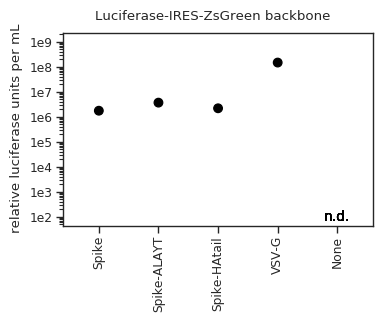

In [20]:
RLU_titers_plot = (ggplot(RLUs_for_Fig.replace(0, float('NaN')), aes(x='spike_cat', y='Average'))+
                         geom_point(size=3, position=position_dodge(width=0.2, preserve='total')) +
                          geom_text(label='n.d.', x=5, y=2, size=10, fontweight='normal', fontstyle='normal') +
                          scale_fill_manual(values=CBPALETTE[1:3], name='Backbone') +
                          scale_shape_manual(values=['o'], name='Backbone') +
                          theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                          figure_size=(4, 2.5)) +
                          scale_y_log10(limits=[1e2, 1e9], breaks=[1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]) +
                          #geom_hline(yintercept=10) +
                          ylab('relative luciferase units per mL') +
                          xlab('') +
                          ggtitle('Luciferase-IRES-ZsGreen backbone'))

_ = RLU_titers_plot.draw()

RLU_titers_plot.save('200413_ZsGreen_titers.pdf')